GoKart, a regional service delivery service company provides different types of package delivery service. An analyst wants to estimate the cost of shipping a package as function of cargo type.

1) Estimate the appropriate multiple linear regression equation to predict the cost of shipping a package<br>
2) Provide interpretation for the regression coefficients.<br>
3) Which cargo type is the costliest? Which one is least costly?<br>
4) How well does the regression fit the sample data? How can the goodness of fitness be improved?<br>
5) Predict the cost of shipping a package with semi-fragile cargo

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

import statsmodels.api as sm

In [2]:
# load data
df = pd.read_csv('C:/Users/Karthik.Iyer/Downloads/AccelerateAI/Regression-Models-main/MLR_Q11_CourierService.csv')
df

,Shipment,CargType,CosoShipment
0,1,Semifragile,84.0
1,2,Durable,24.0
2,3,Fragile,165.6
3,4,Fragile,133.2
4,5,Semifragile,120.0
5,6,Fragile,206.4
6,7,Semifragile,138.0
7,8,Semifragile,78.0
8,9,Semifragile,102.0
9,10,Durable,25.2


In [3]:
#lets look at count for each cargo type
df.CargType.value_counts()

Semifragile    5
Durable        5
Fragile        5
Name: CargType, dtype: int64

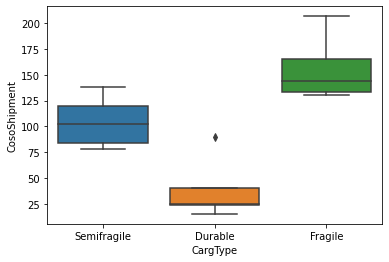

In [4]:
# lets look at how data is distributed
sns.boxplot(data=df, x='CargType', y='CosoShipment')
plt.show()

In [5]:
# lets create dummy variables for cargo types

df_dummy = pd.get_dummies(df.CargType, drop_first=True)
df_dummy

,Fragile,Semifragile
0,0,1
1,0,0
2,1,0
3,1,0
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [6]:
# lets merge the data frames
df = pd.concat([df, df_dummy], axis=1)
df

,Shipment,CargType,CosoShipment,Fragile,Semifragile
0,1,Semifragile,84.0,0,1
1,2,Durable,24.0,0,0
2,3,Fragile,165.6,1,0
3,4,Fragile,133.2,1,0
4,5,Semifragile,120.0,0,1
5,6,Fragile,206.4,1,0
6,7,Semifragile,138.0,0,1
7,8,Semifragile,78.0,0,1
8,9,Semifragile,102.0,0,1
9,10,Durable,25.2,0,0


### 1) Estimate the appropriate multiple linear regression equation to predict the cost of shipping a package

In [7]:
# lets train the model
Y = df['CosoShipment']
X = df[['Fragile', 'Semifragile']]

X = sm.add_constant(X)
reg_model = sm.OLS(Y,X).fit()
reg_model.summary()

C:\Users\Karthik.Iyer\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CosoShipment   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     20.61
Date:                Mon, 16 May 2022   Prob (F-statistic):           0.000132
Time:                        10:41:42   Log-Likelihood:                -70.043
No. Observations:                  15   AIC:                             146.1
Df Residuals:                      12   BIC:                             148.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          39.1200     12.903      3.032      0.010      11.006      67.234
Fragile       116.8800     18.248      6.405      0.000      77.121     156.639
Semifragile    65.2800     18.248      3.577      0.004      25.521     105.039
==============================================================================
Omnibus:                        2.879   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.237   Jarque-Bera (JB):                2.128
Skew:                           0.879   Prob(JB):                        0.345
Kurtosis:                       2.442   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Regression equation:**<br>
CosoShipment = 39.12 + 116.88 * Fragile + 65.28 * Semifragile

### 2) Provide interpretation for the regression coefficients.

- intercept (const): The mean CostofShipment for Durable goods (base category)
- Beta(Fragile) = 116.88: The average increase in CostofShipment of Fragile goods over base category
- Beta(Semifragile) = 65.28: The average increase in CostofShipment of Semifragile goods over base category

### 3) Which cargo type is the costliest? Which one is least costly?

- Costliest = Fragile goods
- Cheapest = Durable goods

### 4) How well does the regression fit the sample data? How can the goodness of fitness be improved?

Adjusted R-Squared = 0.737. The fit is quiet reasonable. We can increase goodness of fit by getting more samples (10 data points per variable at the minimum). Also there is an outlier that needs to be investigated.

### 5) Predict the cost of shipping a package with semi-fragile cargo

**Regression equation:**<br>
CosoShipment = 39.12 + 116.88 * Fragile + 65.28 * Semifragile

In [8]:
CosoShipment = 39.12 + 116.88*0 + 65.28*1 #Fragile is set to 0, as we are calculating only for Semifragile
CosoShipment

104.4